## Observations and Insights 

* The Capomulin and Ramicane treatment are the only two Drug Regimens with more mices at the end of the Timepoint, so it seems that this two regimens are the more effective.
* For the Capomulin Regimen, it seems that as the Timepoint goes further, the Tumor Volume (mm3) diminishes
* The sample of mices was very equitative on Sex of the mices, almost a distribution of 50/50, so we can conclude that the Drug Regimens works at the same level for both sexs

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_df = pd.merge(study_results, mouse_metadata, on="Mouse ID", how="outer")

In [2]:
# Test to check the contents
combined_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


In [3]:
# Checking the number of mice in the DataFrame.
len(combined_df["Mouse ID"].unique())

249

In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicated_df = combined_df.loc[combined_df.duplicated(subset=["Mouse ID","Timepoint"]),"Mouse ID"]
duplicated_df

861    g989
863    g989
865    g989
867    g989
869    g989
Name: Mouse ID, dtype: object

In [5]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicated_all = combined_df.loc[combined_df.duplicated(keep=False, subset=["Mouse ID","Timepoint"])]
duplicated_all

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = combined_df.drop_duplicates(subset=["Mouse ID","Timepoint"],keep=False)

# Verifying that the total rows are less than before
clean_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


In [7]:
# Checking the number of mice in the clean DataFrame.
len(clean_df["Mouse ID"].unique())
# Should be the same number of mices, just without duplicated registers

249

## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM 
# of the tumor volume for each regimen

# Groupby Regimen and then do the pandas operations to get all the data, add them in separated columns
regimen_df = pd.DataFrame(clean_df.groupby(by=["Drug Regimen"], as_index=True)["Tumor Volume (mm3)"].mean())
regimen_df = regimen_df.rename(columns={"Tumor Volume (mm3)":"Mean"})
regimen_df["Median"] = clean_df.groupby(by=["Drug Regimen"], as_index=True)["Tumor Volume (mm3)"].median()
regimen_df["Variance"] = clean_df.groupby(by=["Drug Regimen"], as_index=True)["Tumor Volume (mm3)"].var()
regimen_df["Standard Deviation"] = clean_df.groupby(by=["Drug Regimen"], as_index=True)["Tumor Volume (mm3)"].std()
regimen_df["SEM"] = clean_df.groupby(by=["Drug Regimen"], as_index=True)["Tumor Volume (mm3)"].sem()
regimen_df["Count"] = clean_df.groupby(by=["Drug Regimen"], as_index=True)["Tumor Volume (mm3)"].count()

# Verify contents
regimen_df

# This method is the most straighforward, creating multiple series and putting them all together at the end.
#clean_df.groupby(["Drug Regimen"])[["Tumor Volume (mm3)"]].describe()

,Mean,Median,Variance,Standard Deviation,SEM,Count
Drug Regimen,,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346,230
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821,178
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236,178
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860,188
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466,186
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331,181
Propriva,52.458254,50.854632,44.053659,6.637293,0.540135,151
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955,228
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111,181


In [9]:
# Generate a summary statistics table of mean, median, variance, 
# standard deviation, and SEM of the tumor volume for each regimen

# Apparently this cell came dupplicated, but here I put the describe method to check what information it gives
# also is groped by Regimen and the value that I'm checking the stats for is Tumor Volume
regimens_df_2 = pd.DataFrame(clean_df.groupby(["Drug Regimen"])[["Tumor Volume (mm3)"]].describe())
regimens_df_2

Tumor Volume (mm3)                                             \
                          count       mean       std        min        25%   
Drug Regimen                                                                 
Capomulin                 230.0  40.675741  4.994774  23.343598  37.685933   
Ceftamin                  178.0  52.591172  6.268188  45.000000  47.208427   
Infubinol                 178.0  52.884795  6.567243  36.321346  47.312353   
Ketapril                  188.0  55.235638  8.279709  45.000000  48.232987   
Naftisol                  186.0  54.331565  8.134708  45.000000  47.285874   
Placebo                   181.0  54.033581  7.821003  45.000000  47.459053   
Propriva                  151.0  52.458254  6.637293  45.000000  47.011050   
Ramicane                  228.0  40.216745  4.846308  22.050126  36.674635   
Stelasyn                  181.0  54.233149  7.710419  45.000000  48.047139   
Zoniferol                 182.0  53.236507  6.966589  45.000000  47.337876   

                                               
                    50%        75%        max  
Drug Regimen                                   
Capomulin     41.557809  45.000000  48.158209  
Ceftamin      51.776157  56.801438  68.923185  
Infubinol     51.820584  57.314444  72.226731  
Ketapril      53.698743  60.870951  78.567014  
Naftisol      52.509285  59.963034  76.668817  
Placebo       52.288934  59.916934  73.212939  
Propriva      50.854632  56.528101  72.455421  
Ramicane      40.673236  45.000000  47.622816  
Stelasyn      52.431737  58.719297  75.123690  
Zoniferol     51.818479  57.954259  73.324432

## Bar Plots

In [10]:
# Tests
#bar_plot_df = pd.DataFrame(clean_df.groupby(by=["Drug Regimen","Timepoint"], as_index=False)["Mouse ID"].count())
#bar_plot_df

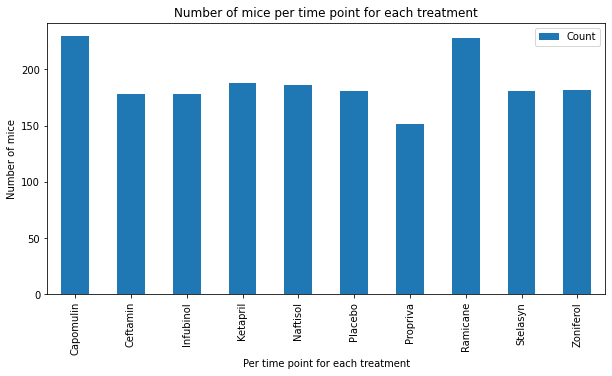

In [11]:
# Generate a bar plot showing the number of mice per time point for each treatment 
# throughout the course of the study using pandas. 

# Use the count value for the total of mices in each regimen/treatment
bar_plot = regimen_df["Count"]
#bar_plot_df.plot(kind="bar", x="Drug Regimen", y="Mouse ID", figsize=(20,10))

# this gives me a nicer bar graph and in less code, but it woon't look equal to the one on the next cell
#clean_df.groupby(by=["Drug Regimen","Timepoint"]).size().unstack().plot(kind="bar", stacked=True, figsize=(10,5))

# Plot as DataFrame.plot and kind="bar" and give format and titles
bar_plot.plot(kind="bar", figsize=(10,5), legend=True)
plt.ylabel("Number of mice")
plt.xlabel("Per time point for each treatment")
plt.title("Number of mice per time point for each treatment")
plt.show()

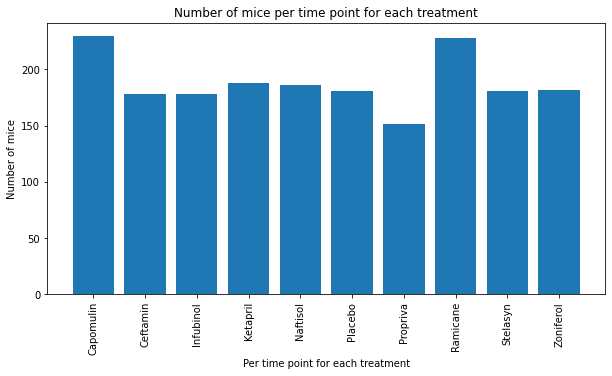

In [12]:
# Generate a bar plot showing the number of mice per time point for each treatment 
# throughout the course of the study using pyplot.

# Set the size first in order to work
plt.figure(figsize=(10,5))
# Plot using mathplotlib with plt.bar and give format and titles
plt.bar(x=bar_plot.index, height=bar_plot.values)
plt.ylabel("Number of mice")
plt.xlabel("Per time point for each treatment")
plt.xticks(rotation="vertical")
plt.title("Number of mice per time point for each treatment")
plt.show()

## Pie Plots

In [13]:
# Grouping by sex and counting for each case how many mices we have
pie_plot = pd.DataFrame(clean_df.groupby(by=["Sex","Mouse ID"], as_index=False).count())
pie_plot = pd.DataFrame(clean_df.groupby(by=["Sex"]).count())["Mouse ID"]
#pie_plot

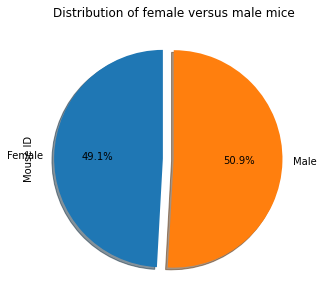

In [14]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
pie_plot.plot(kind="pie", autopct='%1.1f%%', startangle=90, explode=(0.1,0), shadow=True,figsize=(5, 5))
plt.title("Distribution of female versus male mice")
plt.show()

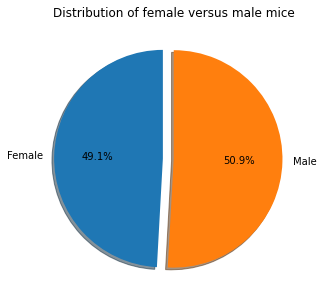

In [15]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = pie_plot.index
plt.figure(figsize=(5,5))
plt.pie(pie_plot, labels=labels ,autopct='%1.1f%%', startangle=90, explode=(0.1,0), shadow=True)
plt.title("Distribution of female versus male mice")
plt.show()

## Quartiles, Outliers and Boxplots

In [16]:
# Get the 4 more promising treatmets, where the most mices are stil alive until the last timepoint
regimen_df3 = regimen_df.sort_values(by="Count", ascending=False)[["Count"]].head(4)
regimen_df3 = regimen_df3.reset_index()
regimen_df3

,Drug Regimen,Count
0,Capomulin,230
1,Ramicane,228
2,Ketapril,188
3,Naftisol,186


In [17]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. 
# Calculate the IQR and quantitatively determine if there are any potential outliers. 

# Searching for the data of the last timepoints
test_timepoint = clean_df["Timepoint"] == 45
# Searching for the cases where the regimen match to the 4 more promising treatmets (previous cell)
test_regimen = clean_df["Drug Regimen"].isin(regimen_df3["Drug Regimen"])
# Setting values of the complete DataFrame to a sub dataframe 
box_plot = clean_df[ test_timepoint & test_regimen ]

# Getting just one Series fo the Tumor Volume (mm3) for calculations
main_regimens = box_plot["Tumor Volume (mm3)"]#pd.DataFrame(box_plot["Tumor Volume (mm3)"])

# Calculate Quartiles and IRQ
quartiles = box_plot["Tumor Volume (mm3)"].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

# Prinit possible values for quartiles
print(f"The lower quartile of Tumor Volume (mm3) is: {lowerq}")
print(f"The upper quartile of Tumor Volume (mm3) is: {upperq}")
print(f"The interquartile range of Tumor Volume (mm3) is: {iqr}")
print(f"The the median of Tumor Volume (mm3) is: {quartiles[0.5]} ")

# Print possible outliers
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")
box_plot

The lower quartile of Tumor Volume (mm3) is: 33.56240217
The upper quartile of Tumor Volume (mm3) is: 66.26880133
The interquartile range of Tumor Volume (mm3) is: 32.706399160000004
The the median of Tumor Volume (mm3) is: 40.65812366 
Values below -15.497196570000007 could be outliers.
Values above 115.32840007000001 could be outliers.


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
9,b128,45,38.982878,2,Capomulin,Female,9,22
40,h246,45,74.104086,2,Ketapril,Male,13,30
50,p189,45,75.294936,4,Ketapril,Male,8,28
79,b559,45,73.051363,1,Naftisol,Male,20,26
89,y260,45,62.909441,4,Ketapril,Female,7,25
...,...,...,...,...,...,...,...,...
1844,l897,45,38.846876,1,Capomulin,Male,17,19
1857,t565,45,34.455298,0,Capomulin,Female,20,17
1867,i557,45,47.685963,1,Capomulin,Female,1,24
1877,m957,45,33.329098,1,Capomulin,Female,3,19


In [18]:
# Get the four regimens of interest and put them in a list to boxplot
box_plot_capomulin = box_plot.loc[box_plot["Drug Regimen"] == "Capomulin","Tumor Volume (mm3)"]
box_plot_ketapril = box_plot.loc[box_plot["Drug Regimen"] == "Ketapril","Tumor Volume (mm3)"]
box_plot_naftisol = box_plot.loc[box_plot["Drug Regimen"] == "Naftisol","Tumor Volume (mm3)"]
box_plot_ramicane = box_plot.loc[box_plot["Drug Regimen"] == "Ramicane","Tumor Volume (mm3)"]
lista = [box_plot_capomulin, box_plot_ketapril, box_plot_naftisol, box_plot_ramicane]


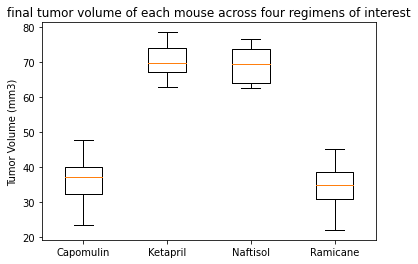

<Figure size 720x720 with 0 Axes>

In [19]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

fig1, ax1 = plt.subplots()

plt.figure(figsize=(10,10))
ax1.set_title('final tumor volume of each mouse across four regimens of interest')
ax1.set_ylabel('Tumor Volume (mm3)')
markers = dict(markerfacecolor='r', marker='o')
#plt.boxplot(box_plot["Tumor Volume (mm3)"])#, flierprops=green_markers, showfliers=True)
ax1.boxplot(lista, flierprops=markers)
ax1.set_xticklabels(["Capomulin","Ketapril","Naftisol","Ramicane"])

plt.show()

## Line and Scatter Plots

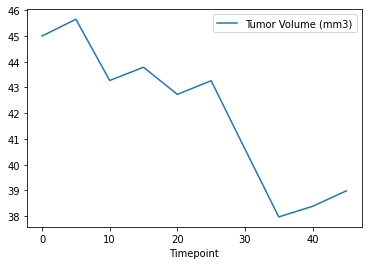

In [20]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

#First we find the mices treated with Capomulin
line_plot_capomulin = clean_df["Drug Regimen"] == "Capomulin"
#Then we get one mouse
line_plot_mouse = clean_df["Mouse ID"] == "b128"
#Then we get the dataset
line_plot = clean_df.loc[line_plot_capomulin & line_plot_mouse]
#then we plot the data
line_plot.plot(x="Timepoint", y="Tumor Volume (mm3)")
plt.show()

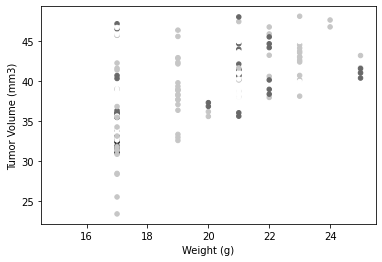

In [21]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
line_plot_capomulin = clean_df["Drug Regimen"] == "Capomulin"
line_plot = clean_df.loc[line_plot_capomulin]
#line_plot_avg = line_plot["Tumor Volume (mm3)"].mean() 
colors = line_plot["Metastatic Sites"]
line_plot.plot(kind="scatter",x="Weight (g)", y="Tumor Volume (mm3)", c=colors)
plt.show()


## Correlation and Regression

In [22]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
(slope,intercept,rvalue,pvalue,stderr)=st.linregress(
    line_plot["Weight (g)"],line_plot["Tumor Volume (mm3)"])

print(f"""Slope = {slope}
Intecept = {intercept}
r = {rvalue}
p = {pvalue}
StdErr = {stderr}

y = ({slope})x + {intercept}
""")

Slope = 0.9609669432428373
Intecept = 21.48982721329953
r = 0.5256995552077173
p = 9.605446629501036e-18
StdErr = 0.10298279892023667

y = (0.9609669432428373)x + 21.48982721329953

